In [1]:
import numpy as np
import scipy as sp
import cv2
import matplotlib.pyplot as plt

# Ejercicio 1
Se reprodujo el ejemplo de la clase donde se aplica un filtro pasa bajos con kernels de distintos tamaños.
En este caso el filtro tiene un efecto de pasa bajos o promediador, donde el píxel actual resulta ser el promedio de todos los píxeles alcanzados por el kernel. Esto genera un suavizado de los bordes causando que la imagen se vea más borrosa y se pierdan detalles.

In [2]:
font = cv2.imread("imgs\Fig0448(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)

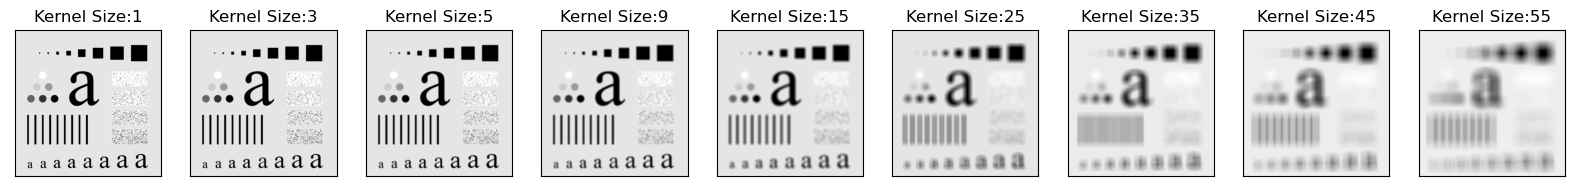

In [3]:
kernel_sizes = np.array([1,3,5,9,15,25,35,45,55])
avs = np.ndarray(kernel_sizes.size, dtype=type(font))
for i,n in enumerate(kernel_sizes):
    avs[i] = cv2.blur(font, (n,n))
plt.gcf().set_size_inches(20,20)

for i,av in enumerate(avs):
    plt.subplot(1,9,i+1)
    plt.imshow(av,cmap='gray')
    plt.title('Kernel Size:'+ str(kernel_sizes[i]))
    plt.xticks([]), plt.yticks([])

# Ejercicio 2
En este ejercicio se utilizó un filtro pasa bajos para eliminar detalles de estrellas más chicas para así obtener un mapa de contornos de los cuerpos más luminosos, bajo el criterio de que deben ser del 75% más luminoso de la imagen.

In [4]:
img = cv2.imread("imgs/stars.png", cv2.IMREAD_GRAYSCALE)

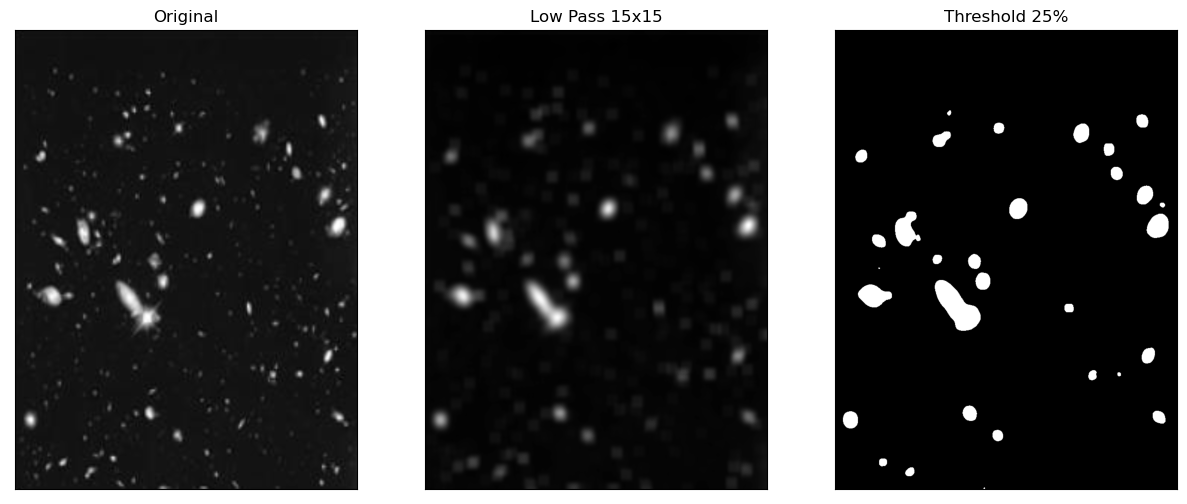

In [5]:
n = 25
m = n
lp15 = cv2.blur(img,(n,m))
ret, thrs = cv2.threshold(lp15,64,255,cv2.THRESH_BINARY)

plt.gcf().set_size_inches(15,15)
plt.subplot(131), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lp15,cmap='gray'), plt.title('Low Pass 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thrs,cmap='gray'), plt.title('Threshold 25%')
plt.xticks([]), plt.yticks([])

plt.show()

# Ejercicio 3
En este ejercicio se observó cómo el filtro mediana es adecuado para eliminar el ruido del tipo *salt and pepper*, el cual no es suficientemente eliminado con un filtro pasa bajos.

In [6]:
img = cv2.imread("imgs\eight.tif", cv2.IMREAD_GRAYSCALE)

In [7]:
def noisy(img, s_vs_p = 0.5, amount = 0.04):
    row,col = img.shape
    out = np.copy(img)

    n_salt, n_pepp = np.ceil(amount*img.size*s_vs_p), np.ceil(amount*img.size*(1.-s_vs_p))
    
    coords = [np.random.randint(0, i - 1, int(n_salt)) for i in img.shape]
    ss = zip(coords[0],coords[1])
    for s in ss:
        out[s] = 1

    coords = [np.random.randint(0, i - 1, int(n_pepp)) for i in img.shape]
    ss = zip(coords[0],coords[1])
    for s in ss:
        out[s] = 0

    return out


In [8]:
img_noisy = noisy(img, 0.5, 0.01)
img_av = cv2.blur(img_noisy, (3,3))
img_med = cv2.medianBlur(img_noisy, 3)

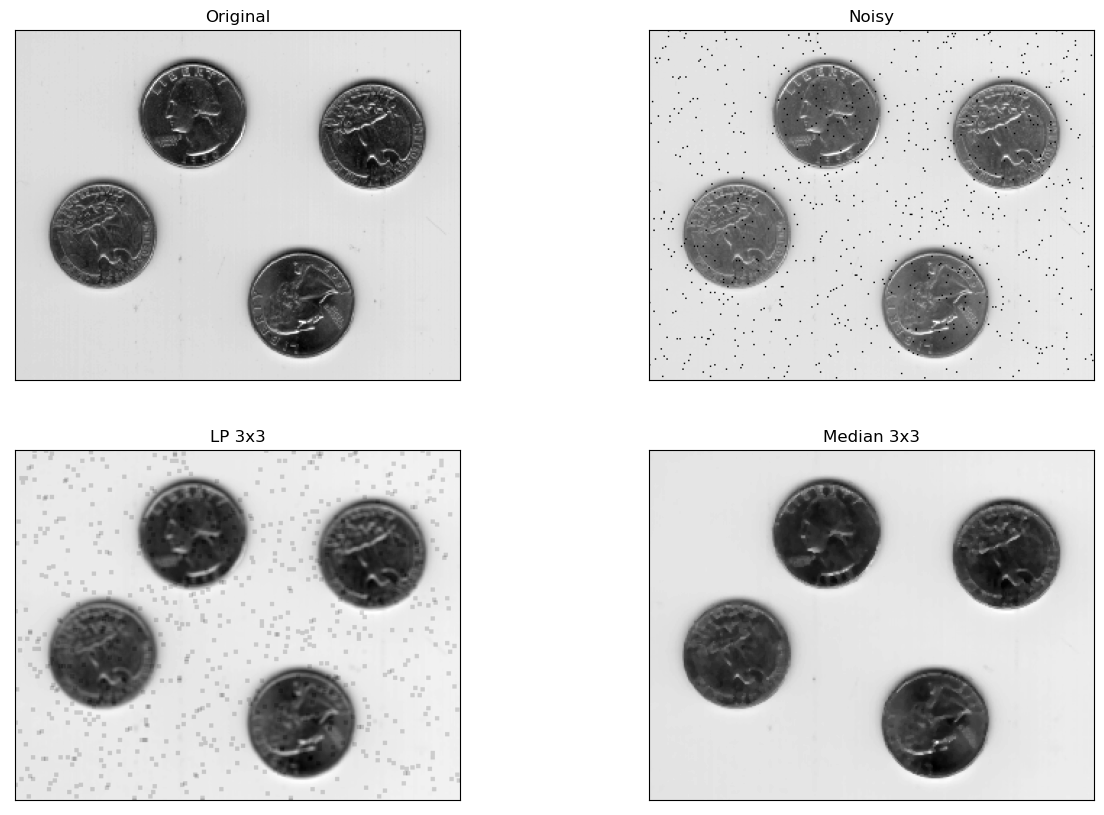

In [9]:
plt.gcf().set_size_inches(15,10)
plt.subplot(221), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_noisy,cmap='gray'), plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_av,cmap='gray'), plt.title('LP 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_med,cmap='gray'), plt.title('Median 3x3')
plt.xticks([]), plt.yticks([])

plt.show()

# Ejercicio 4
Utilizando el operador laplaciano (sin y con diagonales), se puede obtener una imagen con mayor *sharpness* sin perder información del fondo.


In [10]:
moon = cv2.imread('imgs/blurry_moon.tif', cv2.IMREAD_GRAYSCALE)

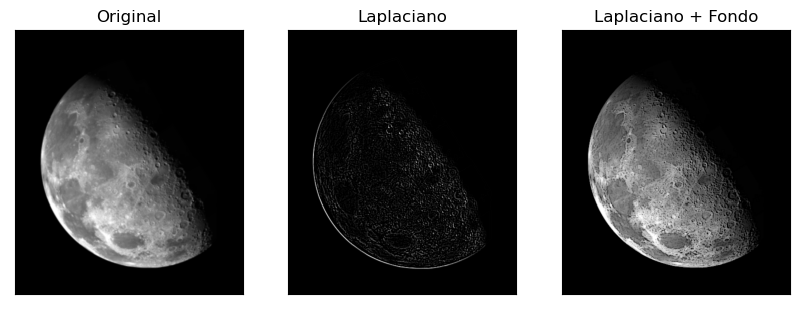

In [11]:
ddepth = -1
kernel_size = 3
lap = cv2.Laplacian(moon, ddepth=ddepth, ksize = kernel_size)

new_moon = cv2.subtract(moon, lap)

plt.gcf().set_size_inches(10,10)
plt.subplot(131), plt.imshow(moon,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lap,cmap='gray'), plt.title('Laplaciano')
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(new_moon,cmap='gray'), plt.title('Laplaciano + Fondo')
plt.xticks([]), plt.yticks([])

plt.show()

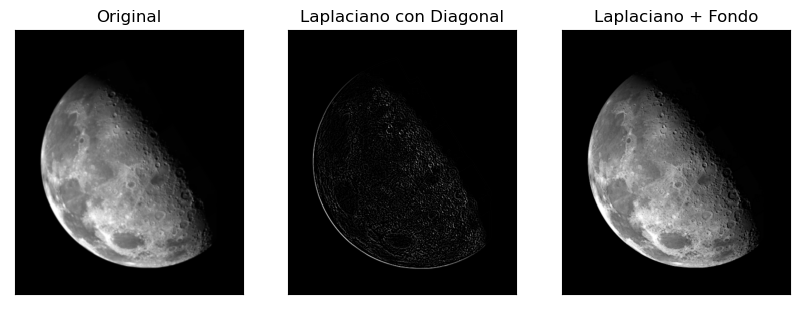

In [12]:
ddepth = -1
lap_kernel = [[1, 1, 1], [1, -8, 1], [1, 1, 1]]
lap_kernel = np.array(lap_kernel)
lap = cv2.Laplacian(moon, ddepth, lap_kernel)

new_moon = cv2.subtract(moon, lap)

plt.gcf().set_size_inches(10,10)
plt.subplot(131), plt.imshow(moon,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lap,cmap='gray'), plt.title('Laplaciano con Diagonal')
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(new_moon,cmap='gray'), plt.title('Laplaciano + Fondo')
plt.xticks([]), plt.yticks([])

plt.show()

# Ejercicio 5
Se mejoró la imagen borrosa aplicando la técnica de High Boost. A valores más altos A se obtiene una imagen más nítida donde se observan más detalles. A valor bajo la imagen resulta oscura.

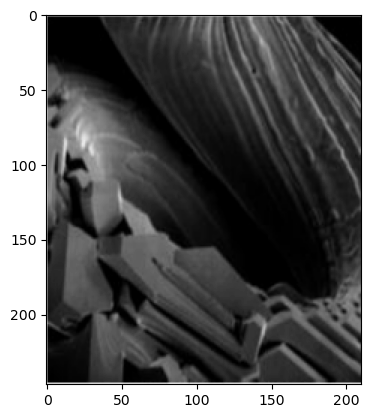

In [14]:
img = cv2.imread('imgs/high-boost.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
def get_lap_kernel(A):
    return np.array([[-1, -1, -1], [-1, 8+A, -1], [-1, -1, -1]])

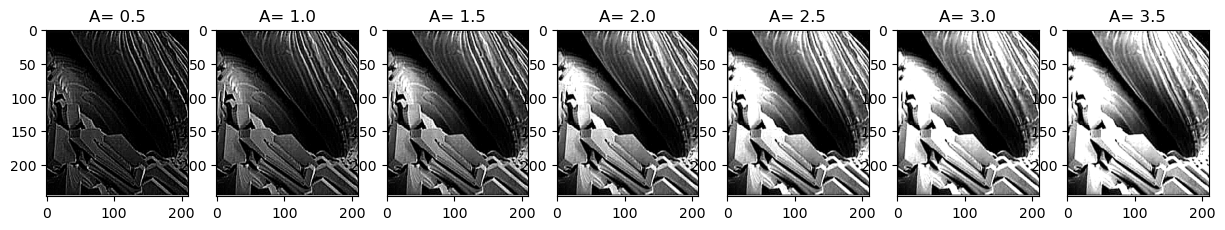

In [ ]:
AA = list(np.arange(.5, 4.0, .5))

new_imgs = []

for A in AA:
    new_img = cv2.filter2D(img, -1, get_lap_kernel(A))
    new_imgs.append(new_img)


figure, axes = plt.subplots(ncols=len(new_imgs), figsize=(15, 15))
for i,imgs in enumerate(new_imgs):
    axes[i].imshow(imgs, cmap='gray')
    axes[i].set_title(f'A= {AA[i]}')

plt.show()

# Ejercicio 6
Filtro homomórfico. Con este filtro es posible esclarecer los detalles en partes más oscuras de la imagen original, que no serían visibles para el ojo humano en principio. Esto es gracias a que estamos redunciendo el efecto de las frecuencias más bajas y magnificando o preservando la potencia de las frecuencias más altas.

In [1]:
import numpy as np
import scipy as sp
import cv2
import matplotlib.pyplot as plt

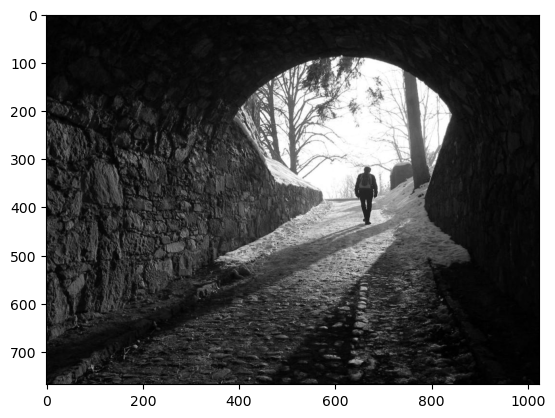

In [9]:
img = cv2.imread('imgs/tun.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [43]:
def homomorfico(img, gh, gl, D0):
    img = np.array(img)
    h,w = img.shape

    # Preparación de la imagen
    z = np.log1p(img)
    Z = np.fft.fftshift(np.fft.fft2(z))

    # Preparación del filtro
    y,x = np.meshgrid(np.arange(-h/2,h/2), np.arange(-w/2,w/2), sparse=True, indexing='ij')
    H = (gh-gl)*(1-np.exp(-(x**2+y**2)/D0**2))+gl

    # Aplicación del filtro
    S = np.multiply(Z,H)
    s = np.exp(np.abs(np.fft.ifft2(S)))

    return s

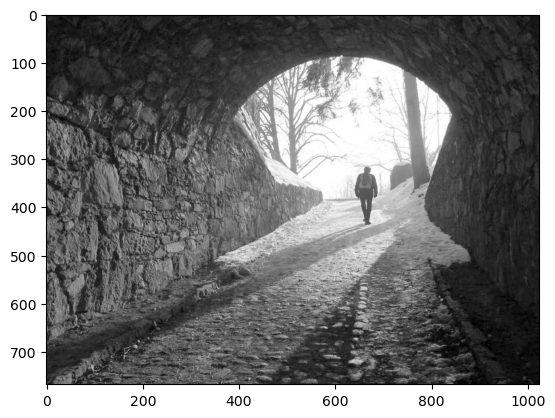

In [53]:
gh = 5.0
gl = .5
D0 = 10000

new_img = homomorfico(img, gh, gl, D0)
plt.imshow(new_img, cmap='gray')
plt.show()